# Análisis de los datos

Se analizan los datos del Corpus PFG.

# Parameters

*  GoldStandardTrainingEAs.txt: contiene una relación de IDS de actos clínicos seguidos de una lista de uno o varios códigos EAs, en caso de que sean aplicables, o NONE en caso de no se haya idetnificado ningún código de efecto adverso. Todos los valores están separados por espacios. Ejemplos:
```
24866017 T50.2X5A
27448436 T83.021A T83.511A T83.091A Y84.6
25205191 NONE
```
*  GoldStandardTestEAs.txt: equivalente al anterior pero con los datos del conjunto de pruebas.
*  EAs.txt: listado de todos los códigos de efectos adversos del CIE10 y su tipo. Ejemplo: 
```
D61.810 - PROC
D61.811 - MED
```
*  CIE-10.tsv: definición del CIE10 completo.
*  Training: carpeta que contiene todos los informes médicos del conjunto de entrenamiento. El nombre del archivo está compuesto por el acto clínico y el identificador del informe. Ejemplo: 23062488-158483734.txt
*  Training: equivalente a training pero con el conjunto de pruebas.



In [8]:
base_path = '/drive/My Drive/CorpusPFG/'

#Archivos y rutas de los datos del CORPUS
GoldStandardTrainingEA_data_location = base_path + 'GoldStandardTrainingEAs.txt'
GoldStandardTestEA_data_location = base_path + 'GoldStandardTestEAs.txt'
EAs_data_location = base_path + 'EAs.txt'
CIE10_data_location = base_path + 'CIE-10.tsv'
training_files_location = base_path + 'Training/'
test_files_location = base_path + 'Test/'

#Archivos y rutas del subconjunto de pruebas


Se realiza el montaje de la unidad de Google Drive para acceder a los ficheros

In [9]:
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# EAs disponibles en los casos clínicos

Carga del archivo de texto GoldStandardTrainingEAs.txt y GoldStandardTestEAs.txt en un data set

In [10]:
import pandas as pd

column_names = ["Acto", "TieneEA_EA1", "EA2", "EA3", "EA4", "EA5", "EA6", "EA7", "EA8", "EA9", "EA10"]
df_goldStandardTrainingEAs = pd.read_csv(GoldStandardTrainingEA_data_location, sep=' ', header=None, names=column_names)
df_goldStandardTestEAs = pd.read_csv(GoldStandardTestEA_data_location, sep=' ', header=None, names=column_names)

Consulta la cantidad de datos



In [11]:
df_goldStandardTrainingEAs.count()

Acto           14502
TieneEA_EA1    14502
EA2              925
EA3              240
EA4               78
EA5               21
EA6                8
EA7                5
EA8                3
EA9                2
EA10               0
dtype: int64

Consulta de las primeras filas del data set

In [12]:
df_goldStandardTrainingEAs.head()

,Acto,TieneEA_EA1,EA2,EA3,EA4,EA5,EA6,EA7,EA8,EA9,EA10
0,27690409,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24626366,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27967924,O90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25774939,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24878023,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se unen todos los códigos EAs de todas las columnas para conocer cuántos códigos EAs hay representados en los casos clínicos.

In [13]:
ds_cantidad_TieneEA_EA1 = df_goldStandardTrainingEAs.TieneEA_EA1.value_counts(dropna=True, sort=True)
ds_cantidad_EA2 = df_goldStandardTrainingEAs.EA2.value_counts(dropna=True, sort=True)
ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
ds_cantidad_EA3 = df_goldStandardTrainingEAs.EA3.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA3)
ds_cantidad_EA4 = df_goldStandardTrainingEAs.EA4.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA4)
ds_cantidad_EA5 = df_goldStandardTrainingEAs.EA5.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA5)
ds_cantidad_EA6 = df_goldStandardTrainingEAs.EA6.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA6)
ds_cantidad_EA7 = df_goldStandardTrainingEAs.EA7.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA7)
ds_cantidad_EA8 = df_goldStandardTrainingEAs.EA8.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA8)
ds_cantidad_EA9 = df_goldStandardTrainingEAs.EA9.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA9)

df_cantidad = pd.DataFrame(ds_all)
df_cantidad = df_cantidad.reset_index()
df_cantidad.columns = ['eas', 'counts'] 
df_cantidad.count()

<ipython-input-13-ffaff8709537>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
<ipython-input-13-ffaff8709537>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA3)
<ipython-input-13-ffaff8709537>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA4)
<ipython-input-13-ffaff8709537>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA5)
<ipython-input-13-ffaff8709537>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future versi

eas       789
counts    789
dtype: int64

<Axes: xlabel='eas'>

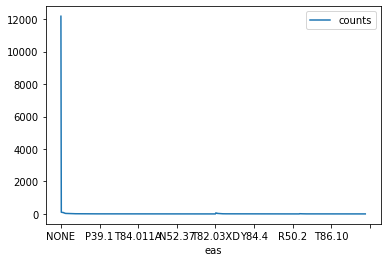

In [14]:
df_cantidad.plot(x='eas', y='counts', kind='line')	

<Axes: xlabel='eas'>

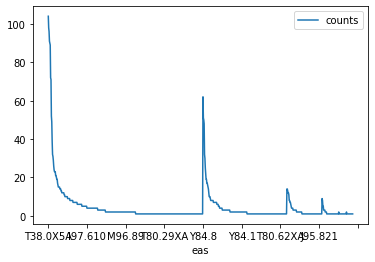

In [15]:
df_cantidad_con_EAs = df_cantidad.query("eas != 'NONE'")
df_cantidad_con_EAs.plot(x='eas', y='counts', kind='line')	

**Estadísticas de EAs**

In [17]:
num_actos_clinicos = df_goldStandardTrainingEAs.Acto.count()
num_actos_clinicos_sin_EA = df_goldStandardTrainingEAs.query("TieneEA_EA1 == 'NONE'").TieneEA_EA1.count()
num_actos_clinicos_con_EA = num_actos_clinicos - num_actos_clinicos_sin_EA
num_eas_con_caso_clinico = df_cantidad.query("eas != 'NONE'")["eas"].nunique()

print("Actos clínicos: %s" % num_actos_clinicos)
print("Número de actos clínicos sin EA: %s, un %s%%" % (num_actos_clinicos_sin_EA, round(num_actos_clinicos_sin_EA/num_actos_clinicos*100, 0)))
print("Número de actos clínicos con EA: %s, un %s%%" % (num_actos_clinicos_con_EA, round(num_actos_clinicos_con_EA/num_actos_clinicos*100, 0)))
print("EAs diferentes encontrados en los actos clínicos: %s" % num_eas_con_caso_clinico)
print("")
print("Los 10 códigos CIE más populares:")

df_cantidad.query("eas != 'NONE'").head(10)

Actos clínicos: 14502
Número de actos clínicos sin EA: 12181, un 84.0%
Número de actos clínicos con EA: 2321, un 16.0%
EAs diferentes encontrados en los actos clínicos: 484

Los 10 códigos CIE más populares:


,eas,counts
1,T38.0X5A,104
2,T45.515A,98
3,T50.2X5A,96
4,Y95,91
5,P01.1,90
6,T81.4XXA,89
7,T45.1X5A,72
8,Y83.1,71
9,O75.2,52
10,E89.0,49


#EAs disponibles

Se han identificado 4 tipos:
* *MED*: efectos adversos a medicamentos, vacunas o similar.
* *PROC*: complicaciones en procedimientos (por ej. cirugías).
* *DISP*: fallos en dispositivos médicos.
* *INF*: infecciones, ya sean nosocomiales o durante un tratamiento médico.

Carga del archivo de texto EAs.txt en un data set

In [18]:
df_EAs = pd.read_csv(EAs_data_location, sep='-', header=None, names=["Code", "Tipo"])
df_EAs['Code'] = df_EAs['Code'].str.strip()

Consulta la cantidad de datos

In [19]:
df_EAs.count()

Code    594
Tipo    594
dtype: int64

Consulta de las primeras filas del data set

In [20]:
df_EAs.head()

,Code,Tipo
0,A80.0,MED
1,D52.1,MED
2,D59.0,MED
3,D59.2,MED
4,D61.1,MED


Cantidad de EAs por tipo

In [21]:
df_EAs.Tipo.value_counts()

 MED              238
 PROC             225
 PROC DISP         60
 PROC INF          47
 PROC MED          11
 PROC DISP INF      9
 MED PROC           2
 PROC MED INF       1
 INF                1
Name: Tipo, dtype: int64

Relación entre EAs totales frente a los EAs con ejemplos disponibles

In [22]:
num_eas_totales = df_EAs["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales: %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

EAs totales: 594
EAs con representanción en caso clínico: 484
El 81.48% de los EAs se dan en al menos un caso clínico.


#Definición del CIE10

Carga del archivo de texto CIE-10.tsv en un data set

In [23]:
df_CIE10 = pd.read_csv(CIE10_data_location, sep='\t', header=(0), low_memory=False)
df_CIE10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164656 entries, 0 to 164655
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Tipo                164656 non-null  object
 1   Code                164656 non-null  object
 2   Final               164656 non-null  int64 
 3   Length              164656 non-null  int64 
 4   Description         164656 non-null  object
 5   Add7                571 non-null     object
 6   Other description   23422 non-null   object
 7   First               293 non-null     object
 8   Also                146 non-null     object
 9   Additional          679 non-null     object
 10  Include             377 non-null     object
 11  Exclude 1           2534 non-null    object
 12  Exclude 2           899 non-null     object
 13  Note                53 non-null      object
 14  Parent Description  80343 non-null   object
 15  Parent Add7         54165 non-null   object
 16  Pa

Consulta de las primeras filas del data set

In [24]:
df_CIE10.head()

,Tipo,Code,Final,Length,Description,Add7,Other description,First,Also,Additional,...,Note,Parent Description,Parent Add7,Parent First,Parent Also,Parent Additional,Parent Include,Parent Exclude 1,Parent Exclude 2,Parent Note
0,diagnóstico,A00,0,3,Cólera,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,diagnóstico,A00.0,1,4,"Cólera debido a Vibrio cholerae 01, biotipo ch...",NaN,"Cólera, clásica / Cólera, debida a Vibrio cho...",NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,diagnóstico,A00.1,1,4,"Cólera debido a Vibrio cholerae 01, biotipo El...",NaN,"Cólera, debida a Vibrio cholerae, biovar eltor...",NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diagnóstico,A00.9,1,4,"Cólera, no especificado",NaN,Cólera (Asiática) (epidémica) (maligna) / Cóle...,NaN,NaN,NaN,...,NaN,Cólera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,diagnóstico,A01,0,3,Fiebres tifoidea y paratifoidea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conteo de los datos del dataset.

In [25]:
df_CIE10.count()

Tipo                  164656
Code                  164656
Final                 164656
Length                164656
Description           164656
Add7                     571
Other description      23422
First                    293
Also                     146
Additional               679
Include                  377
Exclude 1               2534
Exclude 2                899
Note                      53
Parent Description     80343
Parent Add7            54165
Parent First            5624
Parent Also            16218
Parent Additional       9550
Parent Include         18506
Parent Exclude 1       43587
Parent Exclude 2       43150
Parent Note            16181
dtype: int64

Tomamos el fichero de códigos EAs y buscamos los registros en el fichero del CIE 10 que coincidan con su código.

In [26]:
listaCodigosEAs = list(df_EAs.Code.values)
df_CIE10_EAs_Parcial = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAs)]
df_CIE10_EAs_Parcial.head()

,Tipo,Code,Final,Length,Description,Add7,Other description,First,Also,Additional,...,Note,Parent Description,Parent Add7,Parent First,Parent Also,Parent Additional,Parent Include,Parent Exclude 1,Parent Exclude 2,Parent Note
592,diagnóstico,A80.0,1,4,"Poliomielitis paralítica aguda, asociada a vacuna",NaN,"Poliomielitis, paralítica, asociada a la vacuna",NaN,NaN,NaN,...,NaN,Poliomielitis aguda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3346,diagnóstico,D52.1,1,4,Anemia por carencia de ácido fólico inducida p...,NaN,"Anemia, debida a, deficiencia, folato, inducid...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Anemia por carencia de ácido fólico,NaN,NaN,NaN,NaN,NaN,carencia de ácido fólico sin anemia (E53.8),NaN,NaN
3403,diagnóstico,D59.0,1,4,Anemia hemolítica autoinmune inducida por fárm...,NaN,"Anemia, hemolítica, autoinmune, inducido por f...",NaN,NaN,NaN,...,NaN,Anemia hemolítica adquirida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405,diagnóstico,D59.2,1,4,Anemia hemolítica no autoimmune inducida por f...,NaN,"Anemia, deficiencia, enzima, inducido por fárm...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Anemia hemolítica adquirida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,diagnóstico,D61.1,1,4,Anemia aplásica inducida por fármacos,NaN,"Anemia, aplásica, debida a, drogas / Anemia, ...",NaN,NaN,"Utilice código adicional de efecto adverso, si...",...,NaN,Otras anemias aplásicas y síndromes de insufic...,NaN,NaN,NaN,NaN,NaN,neutropenia (D70.-),NaN,NaN


Contamos los registros encontrados en el fichero CIE10. El número coincide con el número de dato del fichero EAs.

In [27]:
df_CIE10_EAs_Parcial.count()

Tipo                  594
Code                  594
Final                 594
Length                594
Description           594
Add7                    2
Other description     468
First                   4
Also                    1
Additional             99
Include                 5
Exclude 1              41
Exclude 2              37
Note                    0
Parent Description    546
Parent Add7           242
Parent First           16
Parent Also             6
Parent Additional      93
Parent Include         45
Parent Exclude 1      160
Parent Exclude 2      246
Parent Note             0
dtype: int64

De los datos encontrados en el fichero CIE10, se determinan cuántos de los códigos son finales y los que no lo son.

In [28]:
df_CIE10_EAs_Parcial.Final.value_counts()

0    330
1    264
Name: Final, dtype: int64

Se crea una lista con los códigos no finales, por cada uno de ellos se buscan los que continúan la jerarquía. Por ejemplo, para el código "D70" que no es final, se buscan los códigos "D70.0", "D70.1", "D70.2", ... que sí lo son. Además, se a la lista de códigos EA completa los códigos finales.

In [29]:
listaCodigosEAsCompleta=[]
listaCodigosEAsNoFinal = list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 0].Code.values)
for ea in listaCodigosEAsNoFinal:
  listaCodigosEAsCompleta.extend(list(df_CIE10[df_CIE10['Code'].str.startswith(ea)].Code))
listaCodigosEAsCompleta.extend(list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 1].Code.values))

Se toma la lista de códigos completa y se busca sobre el fichero CIE10, obteniendo con ello el subconjunto de códigos CIE10 que se correspoden con EAs.

In [30]:
df_CIE10_EAs_Completa = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAsCompleta)]


In [31]:
df_CIE10_EAs_Completa.count()

Tipo                  4176
Code                  4176
Final                 4176
Length                4176
Description           4176
Add7                    11
Other description     1491
First                    5
Also                     1
Additional             131
Include                  5
Exclude 1               83
Exclude 2               55
Note                     0
Parent Description    3683
Parent Add7           2474
Parent First           143
Parent Also              6
Parent Additional      862
Parent Include         333
Parent Exclude 1       913
Parent Exclude 2      2488
Parent Note              0
dtype: int64

In [32]:
num_eas_totales = df_CIE10_EAs_Completa["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales (considerando la lista completa): %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

EAs totales (considerando la lista completa): 4176
EAs con representanción en caso clínico: 484
El 11.59% de los EAs se dan en al menos un caso clínico.


In [33]:
#df_CIE10_EAs_Completa.to_csv(base_path + 'df_CIE10_EAs_Completa.csv')

# Detección de datos más prometedores
Obtener las casos clínicos con EAs más repetidos para crear un dataset 
balanceado y hacer pruebas.

In [66]:
df_cantidad.query("eas != 'NONE'").head(8)["eas"]

,eas,counts
1,T38.0X5A,104
2,T45.515A,98
3,T50.2X5A,96
4,Y95,91
5,P01.1,90
6,T81.4XXA,89
7,T45.1X5A,72
8,Y83.1,71


Vamos a tomar los casos clínicos en los que aparezcan los códigos EAs de los 8 primeros del listado anterior.

In [74]:
ea_count = 0
for count in df_cantidad.query("eas != 'NONE'").head(8)["counts"]:
  ea_count = ea_count + count
print("Cantidad de EAs de los 8 primeros: %s" % ea_count)

Cantidad de EAs de los 8 primeros: 711


In [83]:
import os

file_list = [f for f in os.listdir(training_files_location) 
                  if os.path.isfile(os.path.join(training_files_location, f))]

In [94]:
import os

def get_actos(EA_code):
  query = ("TieneEA_EA1 == '{EA}' or EA2 == '{EA}' or EA3 == '{EA}' or "+
    "EA4 == '{EA}' or EA5 == '{EA}' or EA6 == '{EA}' or EA7 == '{EA}' or "+
    "EA8 == '{EA}' or EA9 == '{EA}' or EA10 == '{EA}'")
  query = query.replace ('{EA}', EA_code)
  return df_goldStandardTrainingEAs.query(query)

def get_actos_file_list(actos):
  result = list()
  for index, row in actos.iterrows():
    texto_filtro = str(row['Acto']) + '-'
    result.append(list(filter(lambda x: texto_filtro in x, file_list)))
  return result

def get_actos_list():
  for ea in df_cantidad.query("eas != 'NONE'").head(8)["eas"]:
    actos = actos.append(get_actos(ea), ignore_index=True)  

actos_list = get_actos_list()
actos_file_list = get_actos_file_list(actos_list)




<ipython-input-94-d069b33ac05a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actos = actos.append(get_actos(ea), ignore_index=True)
<ipython-input-94-d069b33ac05a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actos = actos.append(get_actos(ea), ignore_index=True)
<ipython-input-94-d069b33ac05a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actos = actos.append(get_actos(ea), ignore_index=True)
<ipython-input-94-d069b33ac05a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actos = actos.append(get_actos(ea), ignore_index=True)
<ipython-input-94-d069b33ac05a>:18: FutureWarning: The frame.append method is deprecated and wil

[['27820190-172221613.txt'],
 ['24640635-163021674.txt',
  '24640635-163044790.txt',
  '24640635-163068917.txt'],
 ['27725771-171671883.txt'],
 ['27834890-172074193.txt'],
 ['26111542-167188476.txt'],
 ['24566071-162691082.txt', '24566071-162693008.txt'],
 ['26231056-167475413.txt'],
 ['26461336-168119639.txt'],
 ['26581730-168423816.txt'],
 ['27461786-171008821.txt'],
 ['27653568-171545485.txt'],
 ['26857703-169642023.txt'],
 ['26915305-169587592.txt'],
 ['24796407-163462401.txt'],
 ['26700750-168782058.txt'],
 ['27149497-170097306.txt'],
 ['26447730-168049283.txt', '26447730-168453144.txt'],
 ['25088215-164222480.txt', '25088215-164275643.txt'],
 ['28273920-173350893.txt'],
 ['24053692-161212056.txt', '24053692-161387863.txt'],
 ['27472584-171312841.txt'],
 ['25855852-166453141.txt'],
 ['27614351-171474768.txt'],
 ['26254234-167497974.txt',
  '26254234-167498204.txt',
  '26254234-167736360.txt'],
 ['25918527-166660086.txt'],
 ['25046120-164114288.txt'],
 ['28250894-173373013.txt'],
 